In [50]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

In [51]:
print(os.getcwd())
cwd = os.getcwd()

c:\Users\Esteban\Documents\DTU\4th_Semester\02510_High_Perfomance_Computing_3D\Week2


In [52]:
# LOAD image
img = nib.load(cwd+"\MRI_Brain_T1mprage_1.nii.gz")
data = img.get_fdata()

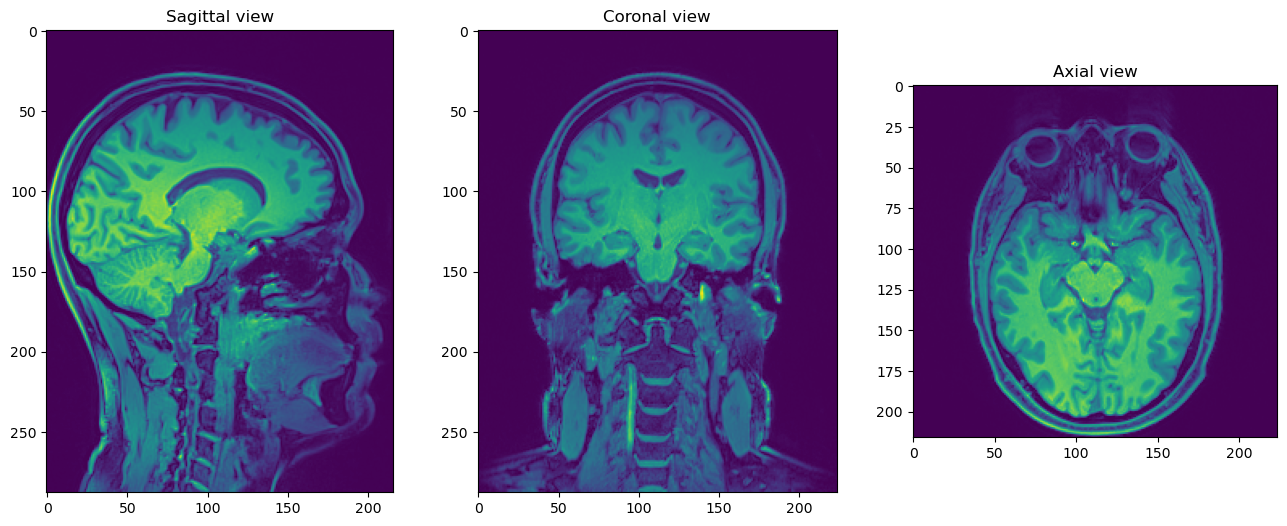

In [53]:


fig, ax = plt.subplots(1,3,figsize=(16,6))

ax[0].imshow(data[100,:,:].T[::-1,:])
ax[0].set_title('Sagittal view')
ax[1].imshow(data[:,100,:].T[::-1,:])
ax[1].set_title('Coronal view')
ax[2].imshow(data[:,:,160].T[::-1,::-1])
ax[2].set_title('Axial view')

plt.show()



Note that the images above have been manipulated to mimic the radiological convention, which is NOT the convention of python

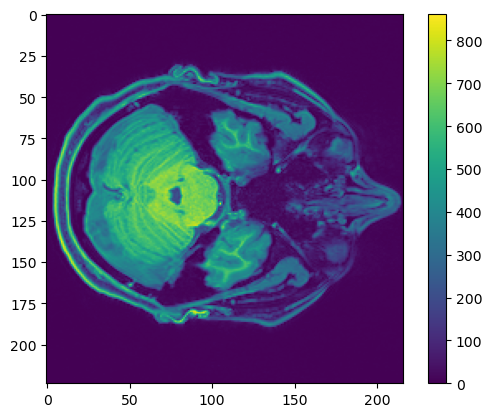

In [69]:
plt.imshow(data[:,:,140],cmap='viridis')
plt.colorbar()

Flatten method transforms a 3D array into a 1D array.

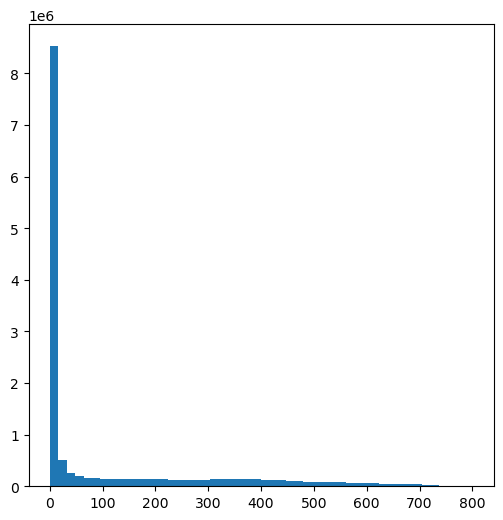

In [55]:
fig, ax = plt.subplots( figsize=(6,6))
ax.hist(data.flatten(),bins=50,range=(0,800))
# ax.set_xlim([0,100])
plt.show()

In [56]:
from skimage.filters import threshold_otsu
global_threshold_otsu = threshold_otsu(data)
print('Otsu threshold',global_threshold_otsu)

Otsu threshold 223.421875


**Global Thresholding - Otsu's Method**

Otsu's thresholding is a widely used method in image processing and computer vision for automatic image thresholding. The method assumes that the image intensity histogram can be modeled as a mixture of two Gaussian distributions, representing the object pixels and the background pixels. The goal is to find the threshold that maximizes the inter-class variance, or the difference between the two distributions. Otsu's method calculates this threshold by formulating an optimization problem and solving it to find the threshold that maximizes the inter-class variance.

In practice, Otsu's method is fast and efficient, and it has been widely used in many applications, including image segmentation, pattern recognition, and feature extraction. However, it has limitations when the image intensity histogram does not have a clear bi-modal distribution, and other thresholding methods may need to be used.

In [57]:
data_slice = data[:,:,180] #2D slice of the 3D data
data_slice_otsu = data_slice>global_threshold_otsu

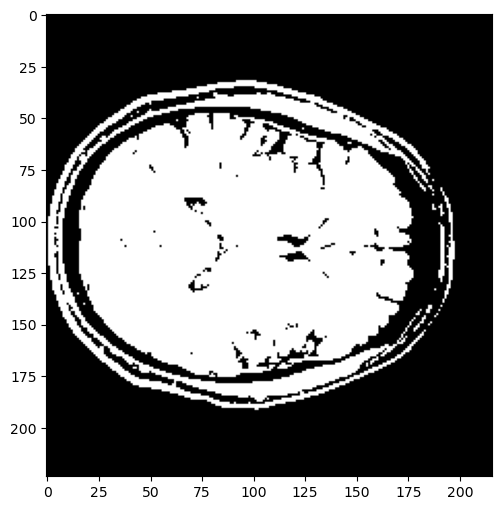

In [58]:
fig, ax = plt.subplots( figsize=(6,6))
ax.imshow(data_slice_otsu, cmap="gray")
plt.show()

**Local Thresholding**

Local thresholding is a technique in image analysis where the threshold for separating object pixels from background pixels is calculated for small, local regions of the image rather than the entire image. The idea is to account for variations in local image intensity and overcome the limitations of global thresholding, where a single threshold value is applied to the entire image. By dividing the image into smaller regions, each with its own threshold, local thresholding can better handle images with non-uniform intensity and improve segmentation accuracy.

In [65]:
from skimage.filters import threshold_local
local_threshold_image = threshold_local(data_slice, block_size=101, offset=0)
print(np.shape(local_threshold_image))

(224, 216)


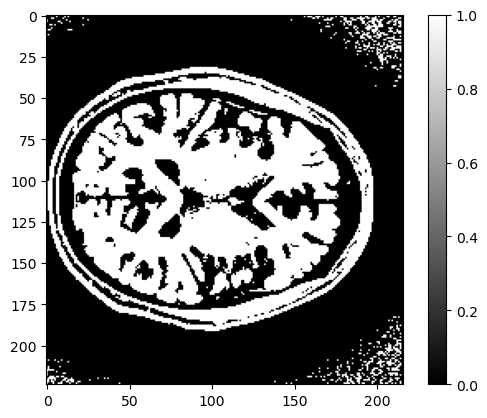

In [66]:
data_slice_local = data_slice>local_threshold_image

plt.imshow(data_slice_local,cmap="gray")
plt.colorbar()

**Image labels**

Pixel connectivity labelling based on the intensity value of the neighbouring pixels.

In [61]:
from skimage.measure import label

In [62]:
binary_slice = data_slice>global_threshold_otsu
labeled_slice, n_labels = label(binary_slice,background=0,return_num=True,connectivity=2)

In [63]:
from random import randint

def create_random_colors(number_of_colors):
    '''
    Returns a list of number_of_colors random RGB colors
    where each channel has values between 0 and 1,
    e.g. red is (1,0,0) and blue is (0,1,0). 
    '''
    colors = []
    for i in range(number_of_colors):
        col_hex = '#%06X' % randint(0, 0xFFFFFF)
        h = col_hex.lstrip('#')
        col_rgb =  tuple(int(h[i:i+2], 16)/256 for i in (0, 2, 4))
        colors.append(col_rgb)
    return colors

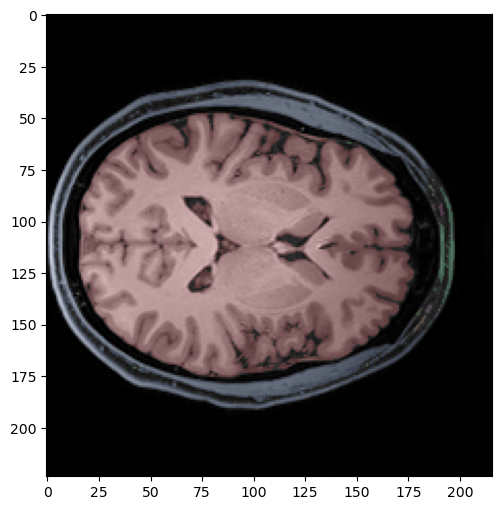

In [67]:
fig, ax = plt.subplots( figsize=(6,6))
ax.imshow(data_slice,cmap='gray')

num_labels_including_bg = len(np.unique(labeled_slice))

colors = create_random_colors(num_labels_including_bg-1)

from skimage.color import label2rgb
image_label_overlay = label2rgb(labeled_slice, colors=colors,bg_label=0)
ax.imshow(image_label_overlay,alpha=0.17)
plt.show()

In [71]:
import skimage
skimage.__version__

'0.19.2'

In [72]:
from skimage.measure import regionprops_table

props = regionprops_table(labeled_slice, properties=('label',
                                                     'centroid',
                                                     'orientation',
                                                     'major_axis_length',
                                                     'minor_axis_length',
                                                     'local_centroid',
                                                     'solidity',
                                                     'eccentricity',
                                                     'area'))

In [73]:
props

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 'centroid-0': array([109.47012761,  40.        ,  47.        , 111.92883061,
         49.        ,  51.        ,  55.        ,  62.        ,
         80.        ,  83.75      , 113.74522293,  87.        ,
         93.25      ,  94.5       , 133.        , 135.        ,
        140.        , 142.5       , 141.        , 144.25      ,
        143.        , 145.5       , 149.58333333, 149.5       ,
        169.5       , 171.        ]),
 'centroid-1': array([ 87.3462877 ,  73.        ,  44.        ,  94.06626774,
         41.        ,  63.        , 124.        , 146.5       ,
        187.        , 186.        , 193.68152866, 187.        ,
        187.25      , 191.        , 188.        ,  15.        ,
         18.        , 185.        , 191.        , 180.        ,
        190.        , 188.5       , 180.58333333, 185.5       ,
        155.        ,  42.5       ]

Props is a dictionary object.

It is one of the main data structures in python, it enables us to relate the key with some specific values related to that key.

*Querying the keys*

In [75]:
dict_keys = props.keys()

In [79]:
key_list = list(dict_keys) #By casting to a list we make the object subscriptable
key_list[0]

'label'

*Querying dictionary entries by key*

In [83]:
idx=2
print(f"Querying the values: {key_list[idx]}")
props[key_list[idx]]

Querying the values: centroid-1


array([ 87.3462877 ,  73.        ,  44.        ,  94.06626774,
        41.        ,  63.        , 124.        , 146.5       ,
       187.        , 186.        , 193.68152866, 187.        ,
       187.25      , 191.        , 188.        ,  15.        ,
        18.        , 185.        , 191.        , 180.        ,
       190.        , 188.5       , 180.58333333, 185.5       ,
       155.        ,  42.5       ])

**Data Framing**

Issues wiyth working with label data as dictionaries. It is not convenient since it is required to make queries. 

We will now explore the dataframe as way to tabularize the data 

In [87]:
import pandas as pd
df = pd.DataFrame(props)
df

,label,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,local_centroid-0,local_centroid-1,solidity,eccentricity,area
0,1,109.470128,87.346288,-0.323697,238.044027,215.098562,77.470128,86.346288,0.142822,0.428360,3448
1,2,40.000000,73.000000,0.785398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
2,3,47.000000,44.000000,0.785398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
3,4,111.928831,94.066268,1.517817,167.174281,124.734823,63.928831,78.066268,0.935449,0.665793,15709
4,5,49.000000,41.000000,0.785398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
5,6,51.000000,63.000000,0.785398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
6,7,55.000000,124.000000,0.785398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
7,8,62.000000,146.500000,1.570796,2.000000,0.000000,0.000000,0.500000,1.000000,1.000000,2
8,9,80.000000,187.000000,0.785398,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1
9,10,83.750000,186.000000,0.692724,4.199930,1.166443,0.750000,1.000000,0.800000,0.960659,4


Too big to work with, lets get a brief overview by querying the head of the dataframe

In [89]:
df.head()
df.tail()

,label,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,local_centroid-0,local_centroid-1,solidity,eccentricity,area
21,22,145.500000,188.500000,0.785398,2.828427,0.000000,0.500000,0.500000,1.00,1.000000,2
22,23,149.583333,180.583333,-0.673864,11.082719,1.511443,3.583333,2.583333,0.75,0.990657,12
23,24,149.500000,185.500000,0.785398,2.828427,0.000000,0.500000,0.500000,1.00,1.000000,2
24,25,169.500000,155.000000,0.000000,2.000000,0.000000,0.500000,0.000000,1.00,1.000000,2
25,26,171.000000,42.500000,1.570796,2.000000,0.000000,0.000000,0.500000,1.00,1.000000,2


Only intereste in area and eccentricty

In [100]:
print(df.columns)
relevant_fields = [df.columns[-2], df.columns[-1]]

Index(['label', 'centroid-0', 'centroid-1', 'orientation', 'major_axis_length',
       'minor_axis_length', 'local_centroid-0', 'local_centroid-1', 'solidity',
       'eccentricity', 'area'],
      dtype='object')


In [111]:
df[df.eccentricity>0.5]

,label,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,local_centroid-0,local_centroid-1,solidity,eccentricity,area
3,4,111.928831,94.066268,1.517817,167.174281,124.734823,63.928831,78.066268,0.935449,0.665793,15709
7,8,62.000000,146.500000,1.570796,2.000000,0.000000,0.000000,0.500000,1.000000,1.000000,2
9,10,83.750000,186.000000,0.692724,4.199930,1.166443,0.750000,1.000000,0.800000,0.960659,4
10,11,113.745223,193.681529,-0.010709,50.332479,8.417789,29.745223,3.681529,0.452450,0.985916,157
12,13,93.250000,187.250000,0.321751,3.464102,1.414214,1.250000,0.250000,0.800000,0.912871,4
13,14,94.500000,191.000000,0.145728,6.699299,1.766179,2.500000,1.000000,0.666667,0.964622,8
17,18,142.500000,185.000000,-0.463648,4.898979,2.000000,1.500000,1.000000,0.800000,0.912871,8
19,20,144.250000,180.000000,-0.692724,4.199930,1.166443,1.250000,1.000000,0.800000,0.960659,4
21,22,145.500000,188.500000,0.785398,2.828427,0.000000,0.500000,0.500000,1.000000,1.000000,2
22,23,149.583333,180.583333,-0.673864,11.082719,1.511443,3.583333,2.583333,0.750000,0.990657,12


Notice how to combine both restrictions we include parenthesis between the different single queries

In [110]:
df[(df.eccentricity>0.5) & (df.area>1000)]

,label,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length,local_centroid-0,local_centroid-1,solidity,eccentricity,area
3,4,111.928831,94.066268,1.517817,167.174281,124.734823,63.928831,78.066268,0.935449,0.665793,15709


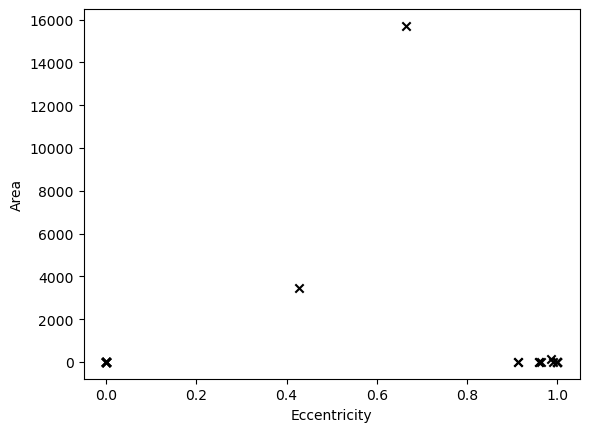

In [130]:
fig = plt.figure()
plt.scatter(df.eccentricity,df.area,marker="x", color="k")
plt.xlabel("Eccentricity")
plt.ylabel("Area")
plt.show()

A word about type values 

When working with pandas, it is usual that queries return specfic values for pandas dataframe in a pandas series frame. to extract the values it is usual that we query performed

Making the assumption that the region with the greater area corresponds to the brain area, we slice the slides with such area.


Text(0.5, 1.0, 'Area of each region')

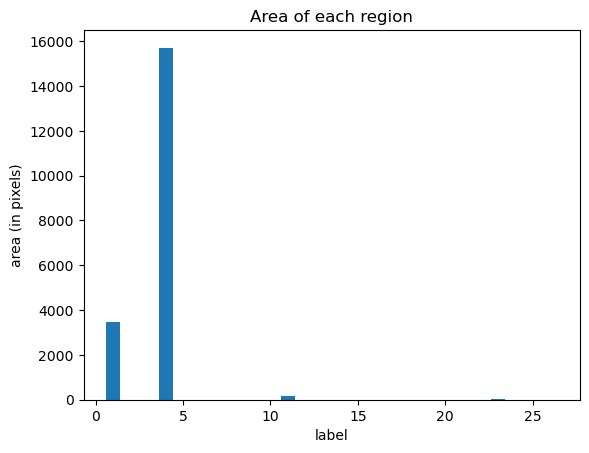

In [133]:
plt.bar(df.label,df.area)
plt.xlabel('label')
plt.ylabel('area (in pixels)')
plt.title('Area of each region')

In [135]:
labels_solodity_lower_than_0p3 = df[df.solidity<0.3].label.values
labels_area_larger_than_100 = df[df.area>100].label.values
labels_area_lower_than_10 = df[df.area<10].label.values

In [136]:
# labels2use = labels_solodity_lower_than_0p3
labels2use = labels_area_larger_than_100
# labels2use = labels_area_lower_than_10

print('The selected labels are',labels2use)

The selected labels are [ 1  4 11]


Keeping only the image pixels that conform the areas that are relevant...

In [137]:
# Initialize
mask_selected_labels = np.zeros_like(labeled_slice)

# set to 1 all the areas where we find a match with the label
for lbl in labels2use:
    mask_selected_labels += (labeled_slice==lbl)

# now let's just change the values 1 into "True" and the 0 to "False"
mask_selected_labels = mask_selected_labels > 0

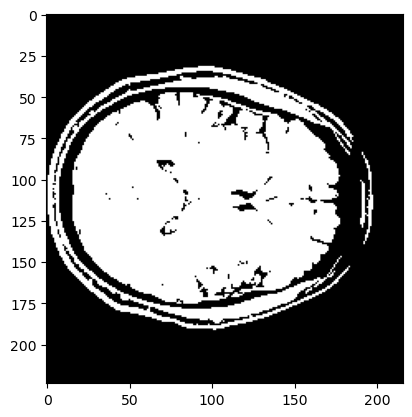

In [140]:
plt.imshow(mask_selected_labels, cmap="gray")

**Convex hull**

Minimal poligon that is capable to envelope the structure. 

Poligon that enbeds with the minimal area 

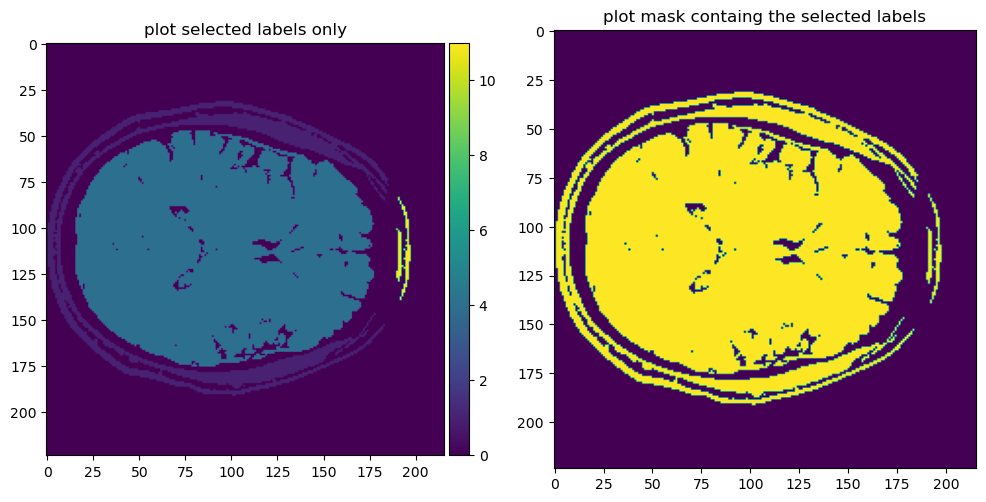

In [141]:


fig, ax = plt.subplots(1,2,figsize=(12,6))

im = ax[0].imshow(labeled_slice*mask_selected_labels)

# cumbersome (but correct) way of adding the colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im,  cax=cax, orientation='vertical')

ax[0].set_title('plot selected labels only')

ax[1].imshow(mask_selected_labels)
ax[1].set_title('plot mask containg the selected labels')

plt.show()



**SKULL STRIPPING**

For slide 0, the maximum area is 2
For slide 1, the maximum area is 2
For slide 2, the maximum area is 1
For slide 3, the maximum area is 1
For slide 4, the maximum area is 22
For slide 5, the maximum area is 2
For slide 6, the maximum area is 1
For slide 7, the maximum area is 12
For slide 8, the maximum area is 13
For slide 9, the maximum area is 10
For slide 10, the maximum area is 8
For slide 11, the maximum area is 10
For slide 12, the maximum area is 4
For slide 13, the maximum area is 5
For slide 14, the maximum area is 6
For slide 15, the maximum area is 4
For slide 16, the maximum area is 8
For slide 17, the maximum area is 12
For slide 18, the maximum area is 13
For slide 19, the maximum area is 13
For slide 20, the maximum area is 8
For slide 21, the maximum area is 7
For slide 22, the maximum area is 3
For slide 23, the maximum area is 4
For slide 24, the maximum area is 5
For slide 25, the maximum area is 4
For slide 26, the maximum area is 6
For slide 27, the maximum area

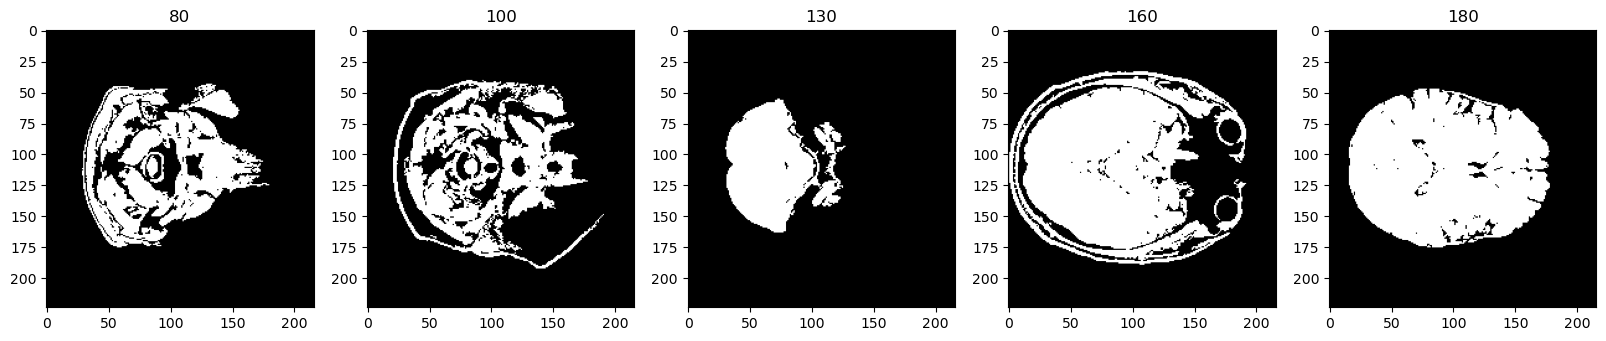

In [146]:
mask_brain = np.zeros_like(data)

for s in range(data.shape[-1]):
    
    binary_slice = data[:,:,s]>global_threshold_otsu
    labeled_slice, n_labels = label(binary_slice,background=0,return_num=True,connectivity=2)
    
    props = regionprops_table(labeled_slice, properties=('label','area'))
    props_df = pd.DataFrame(props)
    
    try:
        idxs = props_df.area==np.max(props_df.area.unique())
        label_max_area = props_df[idxs].label.values[0]
        print(f"For slide {s}, the maximum area is {label_max_area}")
        mask_brain[:,:,s] = labeled_slice==label_max_area
    except:
        print("no foreground detected for slice",s)



slices_to_show = [80, 100 ,130, 160, 180]
n_slices_to_show = len(slices_to_show)
fig, ax = plt.subplots(1,n_slices_to_show, figsize=(20,6))
for i in range(n_slices_to_show):
    ax[i].imshow(mask_brain[:,:,slices_to_show[i]], cmap="gray")
    ax[i].set_title(str(slices_to_show[i]))
plt.show()



The areas are not good enough, therefore, lets do some morphological operations..


In [147]:
from skimage.morphology import binary_erosion, disk

For slide 0, the maximum area is 2
For slide 1, the maximum area is 14
For slide 2, the maximum area is 2
For slide 3, the maximum area is 3
For slide 4, the maximum area is 2
For slide 5, the maximum area is 2
For slide 6, the maximum area is 4
For slide 7, the maximum area is 20
For slide 8, the maximum area is 18
For slide 9, the maximum area is 14
For slide 10, the maximum area is 22
For slide 11, the maximum area is 14
For slide 12, the maximum area is 17
For slide 13, the maximum area is 12
For slide 14, the maximum area is 13
For slide 15, the maximum area is 16
For slide 16, the maximum area is 15
For slide 17, the maximum area is 15
For slide 18, the maximum area is 16
For slide 19, the maximum area is 14
For slide 20, the maximum area is 4
For slide 21, the maximum area is 4
For slide 22, the maximum area is 4
For slide 23, the maximum area is 2
For slide 24, the maximum area is 3
For slide 25, the maximum area is 2
For slide 26, the maximum area is 3
For slide 27, the maximu

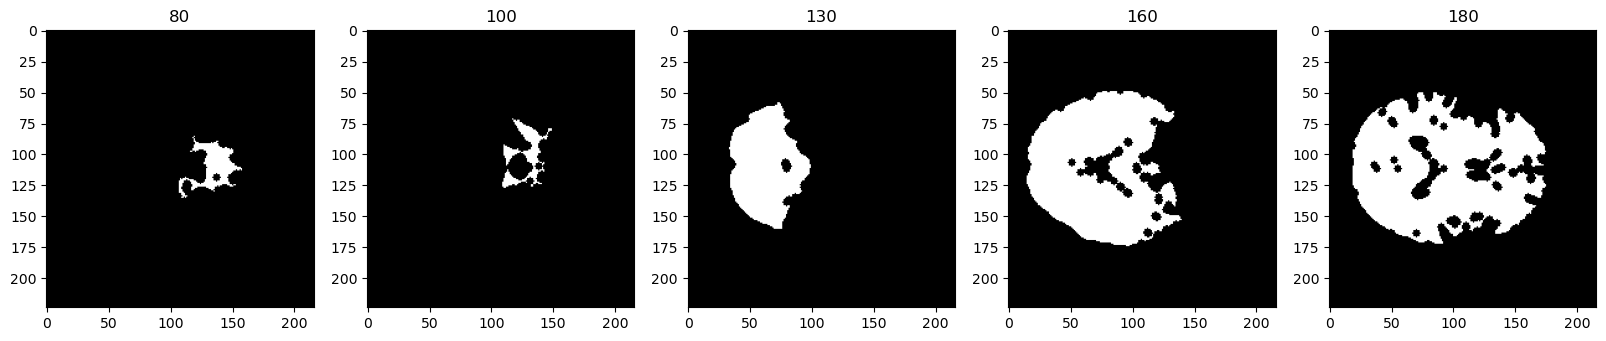

In [149]:
mask_brain = np.zeros_like(data)
footprint = disk(3)

for s in range(data.shape[-1]):
    
    binary_slice = data[:,:,s]>global_threshold_otsu
    eroded = binary_erosion(binary_slice, footprint)
    labeled_slice, n_labels = label(eroded,background=0,return_num=True,connectivity=2)
    
    props = regionprops_table(labeled_slice, properties=('label','area'))
    props_df = pd.DataFrame(props)
    
    try:
        idxs = props_df.area==np.max(props_df.area.unique())
        label_max_area = props_df[idxs].label.values[0]
        print(f"For slide {s}, the maximum area is {label_max_area}")
        mask_brain[:,:,s] = labeled_slice==label_max_area
    except:
        print("no foreground detected for slice",s)



slices_to_show = [80, 100 ,130, 160, 180]
n_slices_to_show = len(slices_to_show)
fig, ax = plt.subplots(1,n_slices_to_show, figsize=(20,6))
for i in range(n_slices_to_show):
    ax[i].imshow(mask_brain[:,:,slices_to_show[i]], cmap="gray")
    ax[i].set_title(str(slices_to_show[i]))
plt.show()


**Convex Hull**

In [150]:
from skimage.morphology import convex_hull_image

For slide 0, the maximum area is 1
For slide 1, the maximum area is 1
For slide 2, the maximum area is 1
For slide 3, the maximum area is 1
For slide 4, the maximum area is 1
For slide 5, the maximum area is 1
For slide 6, the maximum area is 1
For slide 7, the maximum area is 1
For slide 8, the maximum area is 1
For slide 9, the maximum area is 1
For slide 10, the maximum area is 1
For slide 11, the maximum area is 1
For slide 12, the maximum area is 1
For slide 13, the maximum area is 1
For slide 14, the maximum area is 1
For slide 15, the maximum area is 1
For slide 16, the maximum area is 1
For slide 17, the maximum area is 1
For slide 18, the maximum area is 1
For slide 19, the maximum area is 1
For slide 20, the maximum area is 1
For slide 21, the maximum area is 1
For slide 22, the maximum area is 1
For slide 23, the maximum area is 1
For slide 24, the maximum area is 1
For slide 25, the maximum area is 1
For slide 26, the maximum area is 1
For slide 27, the maximum area is 1
Fo

C:\Users\Esteban\AppData\Local\Temp\ipykernel_14888\1166796383.py:9: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  convexed = convex_hull_image(eroded)


no foreground detected for slice 276
no foreground detected for slice 277
no foreground detected for slice 278
no foreground detected for slice 279
no foreground detected for slice 280
no foreground detected for slice 281
no foreground detected for slice 282
no foreground detected for slice 283
no foreground detected for slice 284
no foreground detected for slice 285
no foreground detected for slice 286
no foreground detected for slice 287


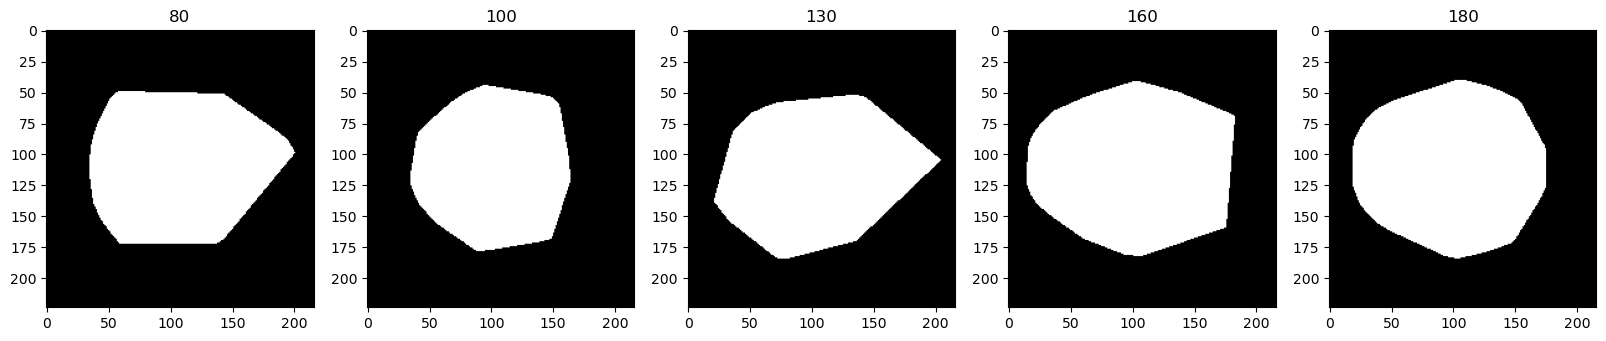

In [155]:
mask_brain = np.zeros_like(data)
footprint = disk(3)

for s in range(data.shape[-1]):
    
    binary_slice = data[:,:,s]>global_threshold_otsu
    eroded = binary_erosion(binary_slice, footprint)
    try:
        convexed = convex_hull_image(eroded)
        labeled_slice, n_labels = label(convexed,background=0,return_num=True,connectivity=2)
    
    except:
        print("no convex_hull")
        continue
    
    props = regionprops_table(labeled_slice, properties=('label','area'))
    props_df = pd.DataFrame(props)
    
    try:
        idxs = props_df.area==np.max(props_df.area.unique())
        label_max_area = props_df[idxs].label.values[0]
        print(f"For slide {s}, the maximum area is {label_max_area}")
        mask_brain[:,:,s] = labeled_slice==label_max_area
    except:
        print("no foreground detected for slice",s)



slices_to_show = [80, 100 ,130, 160, 180]
n_slices_to_show = len(slices_to_show)
fig, ax = plt.subplots(1,n_slices_to_show, figsize=(20,6))
for i in range(n_slices_to_show):
    ax[i].imshow(mask_brain[:,:,slices_to_show[i]], cmap="gray")
    ax[i].set_title(str(slices_to_show[i]))
plt.show()

____________________________________________

**Challenge: find a better brain extration strategy starting from the local thresholding instead of Otsu's method.**

Current Strategy.


Strategy:
- Get a slide
- Non-linear filtring: Median ?
- Thresholding: Adaptive Thresholding...
-


______

Display the brain in the coronal view. In that view, color each axial slice according to the slice's area of the segmented brain.

In [158]:
# Fresh load the image:

img = nib.load(cwd+"\MRI_Brain_T1mprage_1.nii.gz")
img_3d = img.get_fdata()

In [165]:
img_3d.shape[2]

288

In [178]:
img_3d.shape[2]-1

287

First compute the brain area in the axial view

In [179]:
from skimage import filters

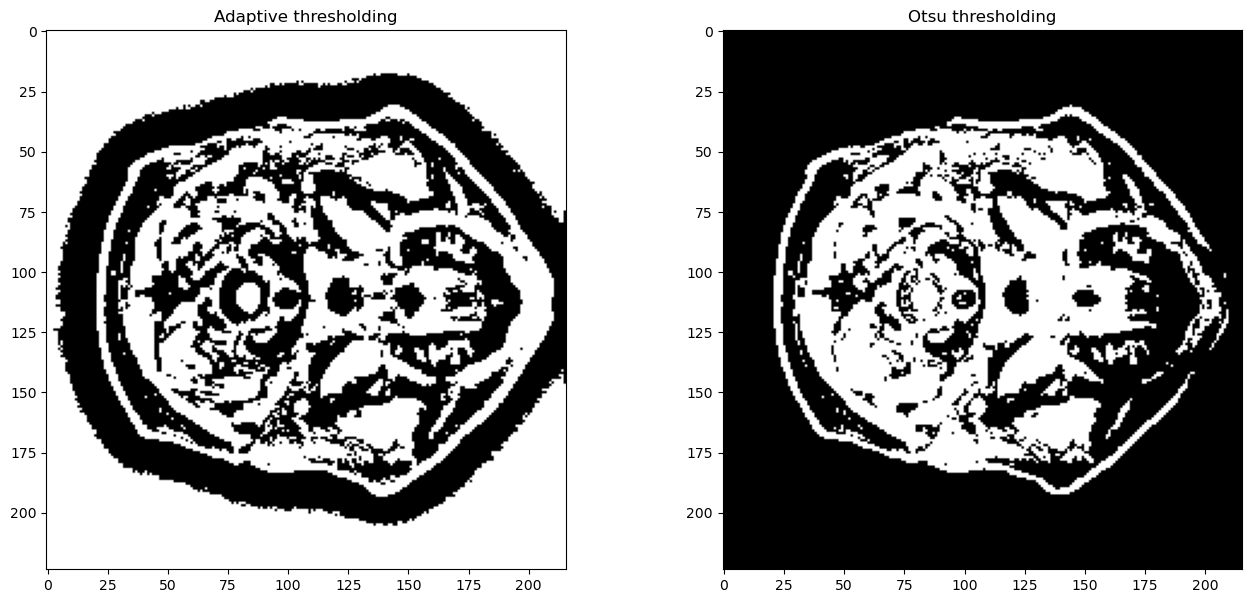

In [186]:
for i in range(img_3d.shape[2]-1):
    slide = img_3d[:,:,i]
    threshold_value_adaptive = filters.threshold_local(slide, block_size=51, method='gaussian', offset=10)
    threshold_value_otsu = filters.threshold_otsu(slide)
    binary_image_adaptive = slide > threshold_value_adaptive
    binary_image_otsu = slide > threshold_value_otsu
    if i == 100:
        fig, axs = plt.subplots(1,2,figsize=(16,7))
        axs[0].imshow(binary_image_adaptive, cmap = "gray")
        axs[0].set_title("Adaptive thresholding")
        axs[1].imshow(binary_image_otsu, cmap = "gray")
        axs[1].set_title("Otsu thresholding")

In [194]:
from skimage.morphology import closing

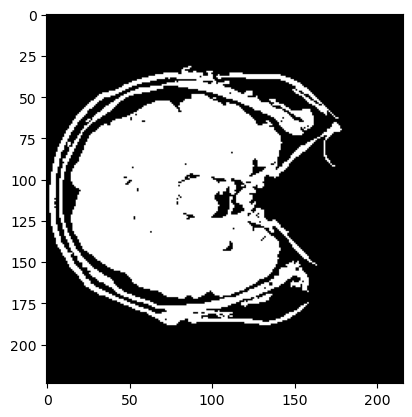

In [209]:
for i in range(img_3d.shape[2]-1):
    # Get the slide
    slide = img_3d[:,:,150]
    # Binarize with threshold
    threshold_otsu = filters.threshold_otsu(slide)
    binary_image_adaptive = slide > threshold_otsu
    # Morpholigcal operations
    footprint = disk(2)
    closed = closing(binary_image_adaptive, footprint)
    # Extract labels
    labeled_slice, n_labels = label(binary_image_adaptive,background=0,return_num=True,connectivity=2)
    # Compute the label properties
    props = regionprops_table(labeled_slice, properties=("label","area"))
    df = pd.DataFrame(props)
    # Extract labels whose properties match the restrictions
    labels_area_larger_than_100 = df[df.area>100].label.values
    labels2use = labels_area_larger_than_100
    # Add the labelled regions to a new mask
    mask_selected_labels = np.zeros_like(labeled_slice)
    for lbl in labels2use:
        mask_selected_labels += (labeled_slice==lbl)
    mask_selected_labels = mask_selected_labels > 0
    # The finalized mask is 
    plt.imshow(mask_selected_labels, cmap="gray")  
    break